In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from skimage import util
from scipy import ndimage
from skimage import measure

from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

%matplotlib inline

In [19]:
names = ['N1','N2','N3','N4','N5','N6','N7']
triangle = pd.read_csv("Hu_moments/triangle_data.csv", names=names)
trapezoid = pd.read_csv("Hu_moments/trapezoid_data.csv", names=names)
shape_set = pd.read_csv("Hu_moments/shape_data.csv")

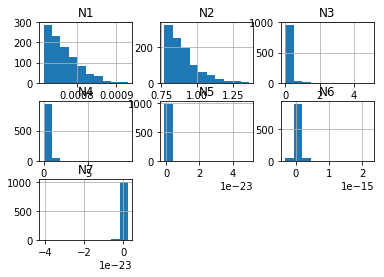

In [20]:
triangle.hist()

plt.show()

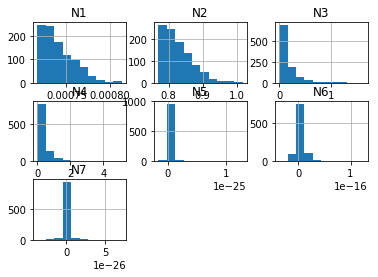

In [21]:
trapezoid.hist()
plt.show()

In [38]:
array = shape_set.values
print(len(array))
X = array[:,0:4]
Y = array[:,7]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

2000
(1600, 4) (1600,)
(400, 4) (400,)


In [80]:
clf = svm.SVC()
clf.fit(X_train, Y_train)

gnb = GaussianNB()
gnb.fit(X_train, Y_train)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

kc = KNeighborsClassifier()
kc.fit(X_train, Y_train)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
svm_predict = clf.predict(X_test)
gnb_predict = gnb.predict(X_test)
dtc_predict = dtc.predict(X_test)
kc_predict = kc.predict(X_test)
lda_predict = lda.predict(X_test)
lr_predict = lr.predict(X_test)

print ('SVM Score:', clf.score(X_test, Y_test))
print ('Naive Bayes Score:', gnb.score(X_test, Y_test))
print ('k-Nearest Neighbors Score:', kc.score(X_test, Y_test))
print ('Decision Tree Classifier Score:', dtc.score(X_test, Y_test))
print ('Linear Discriminant Analysis Score:', lda.score(X_test, Y_test))
print ('Logistic Regression Score:', lr.score(X_test, Y_test))

SVM Score: 0.665
Naive Bayes Score: 0.6925
k-Nearest Neighbors Score: 0.6125
Decision Tree Classifier Score: 0.6275
Linear Discriminant Analysis Score: 0.7225
Logistic Regression Score: 0.6875


/anaconda2/envs/py36-test/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: This function is deprecated. Please call randint(1, 300 + 1) instead
  del sys.path[0]


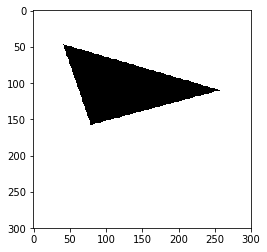

In [45]:
# count = 0
# triangle_data = []
# while count < 20:
    
#     # Define size limit
#     square_size = 300
    
#     # Create white rectangle space
#     img = np.zeros((square_size,square_size,3), np.uint8)
#     img = util.invert(img)
    
#     # Generate polygon coordinate randomly
#     triangle = np.random.random_integers(square_size, size=(3,2))
    
#     # Generate polygon based on its coordinate
#     pts = np.array(triangle, np.int32)
#     pts = pts.reshape((-1,1,2))
#     polygon = cv2.polylines(img,[pts],True,(0,0,0),thickness=5)

    
#     # Extract feature polygon
#     labeled_array, num_features = ndimage.label(polygon)
#     labeled_array = np.float32(labeled_array)

    
#     # Based on the observation, only when num_features=2 polygon are useful
#     if num_features == 2:
        
#         region = list(np.where(labeled_array == 2))

#         arr = np.zeros(img.shape)
#         poly1 = zip(region[0], region[1])
#         for i in poly1:
#             arr[i] = 1
#         arr = util.invert(arr)
#         plt.imshow(arr, cmap='gray')
#         plt.savefig('hi.png')  
# #         plt.show()
        
#         image = cv2.imread('hi.png')
#         feature_poly = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#         hu_moments = cv2.HuMoments(cv2.moments(feature_poly)).flatten()
#         triangle_data.append(hu_moments[0:4])
# #         print('Hu moments of given image are {}'.format(hu_moments))
        
#         count += 1

In [32]:
# result = 0
# for i in triangle_data:
#     predict = clf.predict([i])[0]
# #     predict = gnb.predict([i])[0]
#     if predict == 'Triangle':
#         result += 1
# print('Correct rate:{}'.format(result/len(triangle_data)))

Correct rate:0.3


'Triangle'